<a href="https://colab.research.google.com/github/JonathanRibeiro92/RNN_disciplina/blob/main/aula08a_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget -P input/ http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

# !gzip -d input/train-images-idx3-ubyte.gz
# !gzip -d input/train-labels-idx1-ubyte.gz
# !gzip -d input/t10k-images-idx3-ubyte.gz
# !gzip -d input/t10k-labels-idx1-ubyte.gz

# training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
# training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
# test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
# test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

--2023-05-15 16:51:47--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘input/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-05-15 16:51:47 (92.3 MB/s) - ‘input/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-05-15 16:51:47--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Reusing existing connection to yann.lecun.com:80.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘input/train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB/s    in 0s      

2023-05-15 16:51:47 (505 MB/s) - ‘input/train-labels-idx1-ubyte.gz’ 

In [7]:
import gzip
import os
import sys
import struct
import numpy as np

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)


input_path = 'input'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte.gz')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte.gz')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte.gz')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte.gz')

np.savez_compressed(
        'mnist',
        train_images=read_image(gzip.open(training_images_filepath, 'rb')),
        train_labels=read_label(gzip.open(training_labels_filepath, 'rb')),
        test_images=read_image(gzip.open(test_images_filepath, 'rb')),
        test_labels=read_label(gzip.open(test_labels_filepath, 'rb'))
    )

In [8]:
data = np.load('mnist.npz')

print(data['train_images'].shape, data['train_images'].dtype)
print(data['train_labels'].shape, data['train_labels'].dtype)
print(data['test_images'].shape, data['test_images'].dtype)
print(data['test_labels'].shape, data['test_labels'].dtype)

(60000, 28, 28) float32
(60000,) uint8
(10000, 28, 28) float32
(10000,) uint8


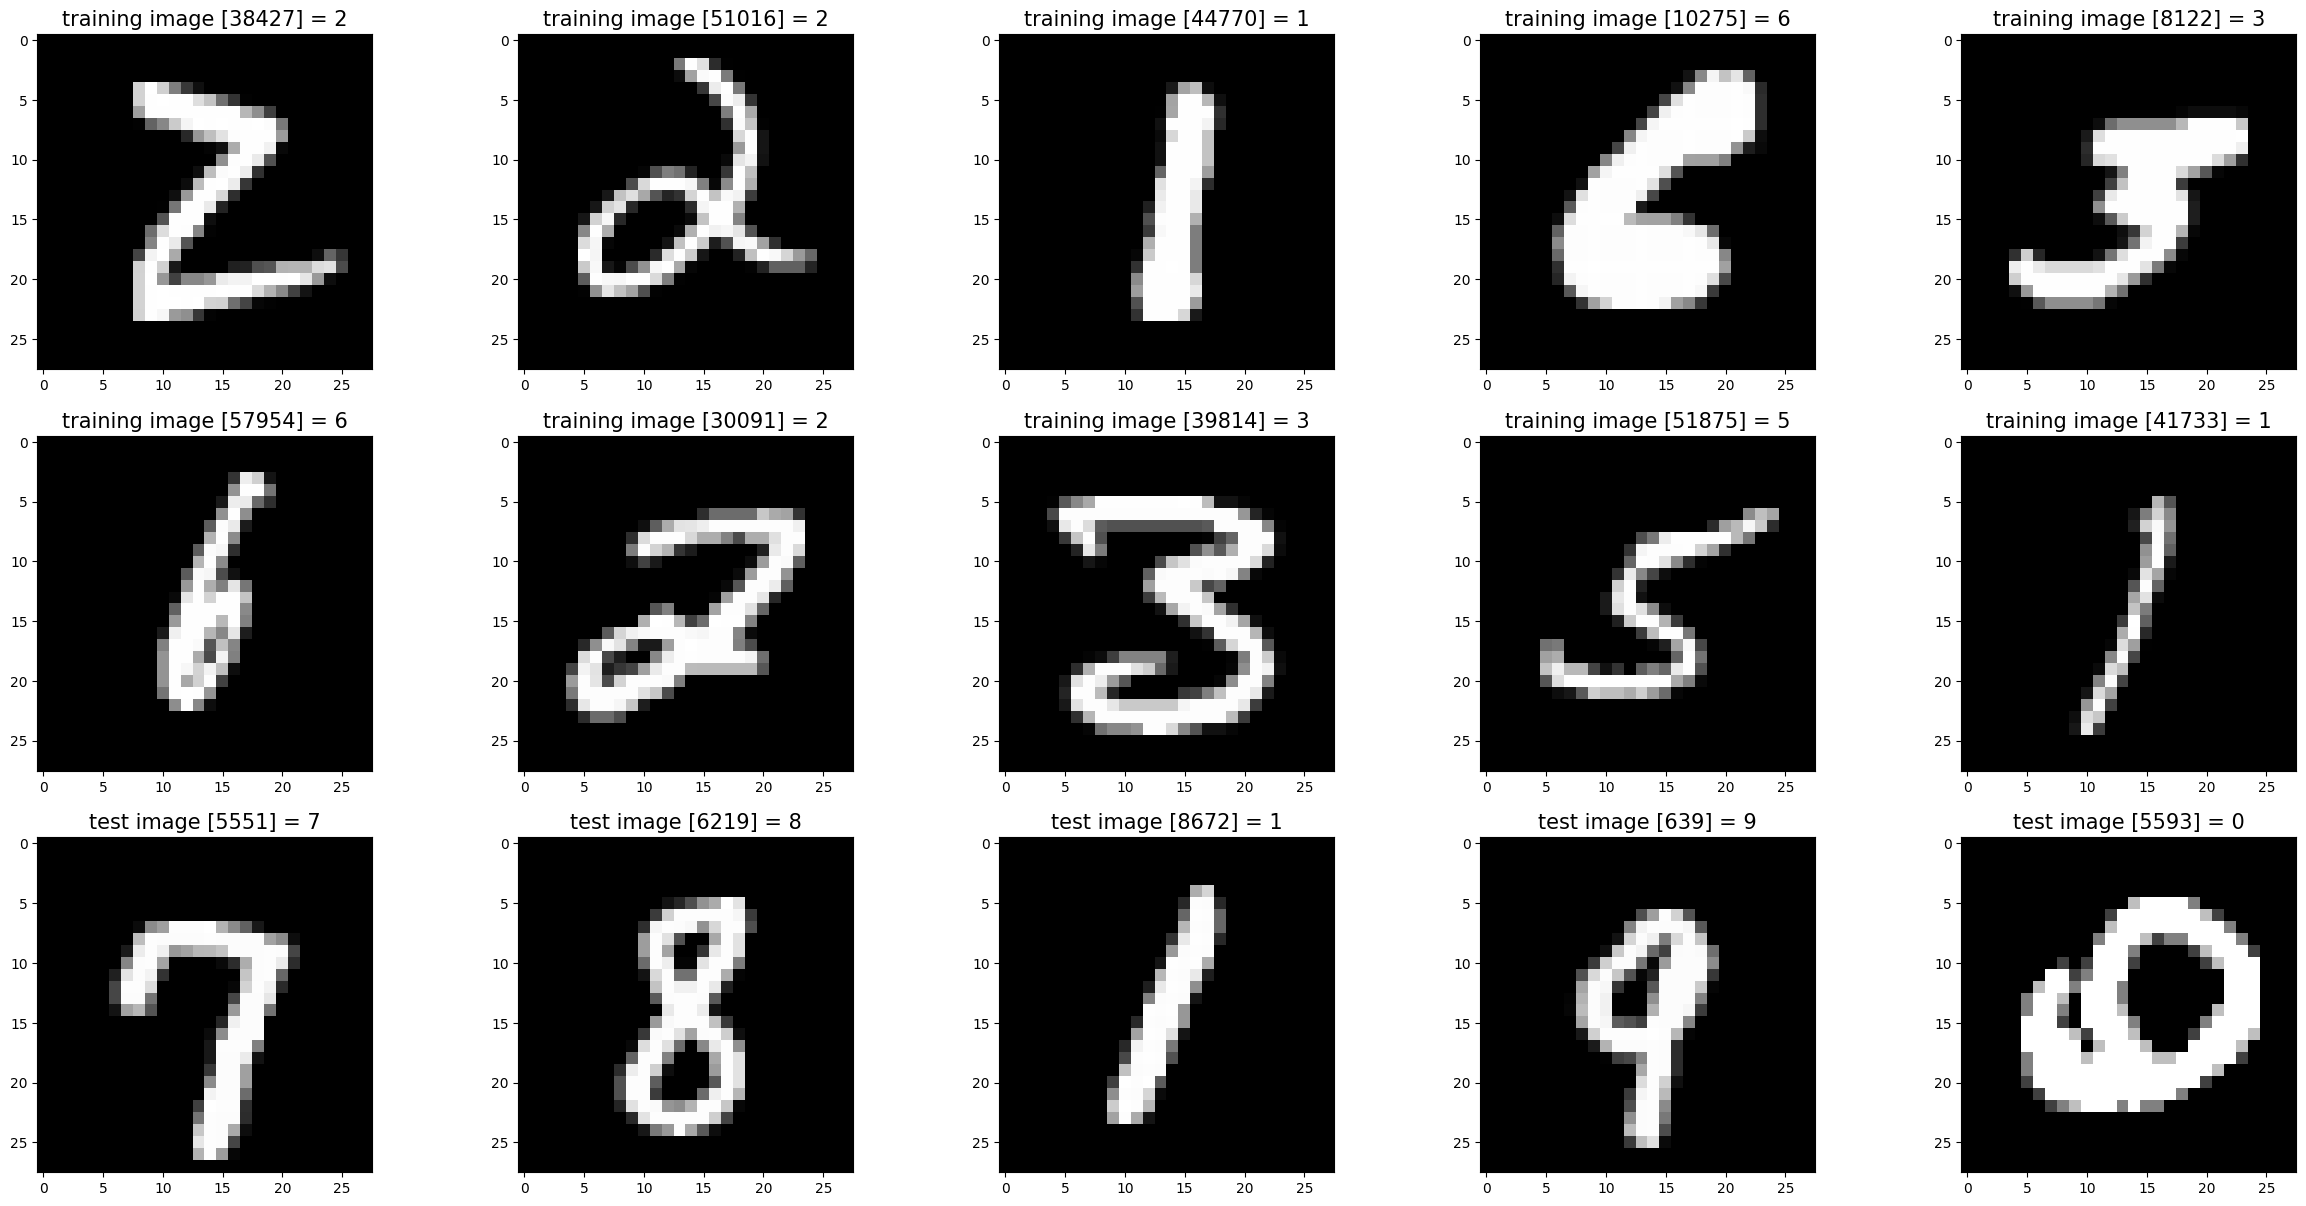

In [9]:
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt


#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
data = np.load('mnist.npz')
train_images = data['train_images']
train_labels = data['train_labels']
test_images = data['test_images']
test_labels = data['test_labels']

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(train_images[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(train_labels[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(test_images[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(test_labels[r]))    

show_images(images_2_show, titles_2_show)


In [10]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

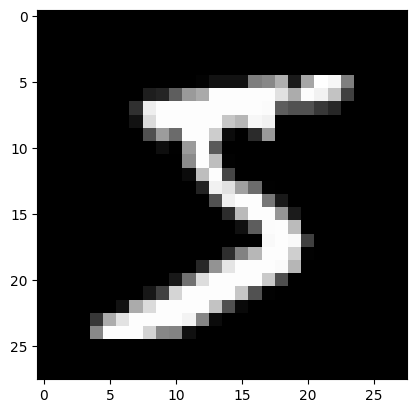

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32")

In [15]:
(train_images.shape, train_labels), (test_images.shape, test_labels)

(((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 ((10000, 784), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [34]:
model.fit(train_images, train_labels, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3329 - accuracy: 0.9046
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3265 - accuracy: 0.9061
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3203 - accuracy: 0.9090
Epoch 4/30
469/469 [==============================] - 4s 7ms/step - loss: 0.3148 - accuracy: 0.9093
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3094 - accuracy: 0.9107
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3041 - accuracy: 0.9123
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2991 - accuracy: 0.9134
Epoch 8/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2946 - accuracy: 0.9151
Epoch 9/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2899 - accuracy: 0.9165
Epoch 10/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2851 - accuracy: 0.9176

In [35]:
predicted = model.predict(test_images[0:1])
predicted[0]

1/1 [==============================] - 0s 19ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [36]:
predicted[0].argmax()

7

In [37]:
predicted[0][7]

1.0

In [38]:
test_labels[0]

7

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 23.7346 - accuracy: 0.9183
test_acc: 0.9182999730110168


In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(len(set(y)), activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    predictions = self.model.predict(X)
    return np.argmax(predictions, axis=1)

modelo = RedeNeural(epochs=30)
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
ypred

Epoch 1/30
469/469 [==============================] - 4s 9ms/step - loss: 2.2386 - accuracy: 0.2578
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 1.6851 - accuracy: 0.5976
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 1.0563 - accuracy: 0.7444
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.7577 - accuracy: 0.8073
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.6108 - accuracy: 0.8377
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.5289 - accuracy: 0.8583
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.4774 - accuracy: 0.8697
Epoch 8/30
469/469 [==============================] - 4s 9ms/step - loss: 0.4420 - accuracy: 0.8779
Epoch 9/30
469/469 [==============================] - 4s 8ms/step - loss: 0.4161 - accuracy: 0.8841
Epoch 10/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3969 - accuracy: 0.8890

array([7, 2, 1, ..., 4, 8, 6])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, ypred)

0.8844

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2681 - accuracy: 0.9228
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1084 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0723 - accuracy: 0.9782
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0511 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.9804

In [47]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin , TransformerMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np


class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 20s 42ms/step - loss: 0.2062 - accuracy: 0.9384
Epoch 2/5
469/469 [==============================] - 20s 42ms/step - loss: 0.0658 - accuracy: 0.9805
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0412 - accuracy: 0.9877
Epoch 4/5
469/469 [==============================] - 20s 42ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 2s 7ms/step


0.9828